<a href="https://colab.research.google.com/github/aish0606/ImageProcessing/blob/main/alpha_blending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://i.pinimg.com/originals/5c/c8/c7/5cc8c7bc12b4551829493eef8471ce32.png
!mv 5cc8c7bc12b4551829493eef8471ce32.png puppy.png
!wget https://mk0slidecowixjpdg2l0.kinstacdn.com/wp-content/uploads/2018/04/Bring-in-and-Position-Image-1000x563.jpg
!mv Bring-in-and-Position-Image-1000x563.jpg text.jpg
!wget https://www.nicepng.com/png/detail/187-1873722_warning-stamp-png-clip-art-black-and-white.png
!mv 187-1873722_warning-stamp-png-clip-art-black-and-white.png text.png

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img1 = cv2.imread('puppy.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('text.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

(340, 510, 3)


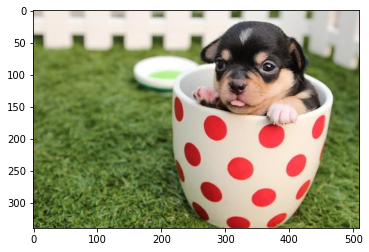

In [ ]:
print(img1.shape)
plt.imshow(img1)

(200, 200, 3)
(200, 200)


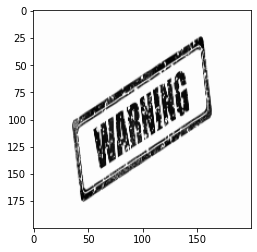

In [ ]:

img2_resized = cv2.resize(img2, (200, 200))
print(img2_resized.shape)
mask = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
mask = cv2.resize(mask, (200, 200))
print(mask.shape)
plt.imshow(mask, cmap='gray')

(200, 200)


True

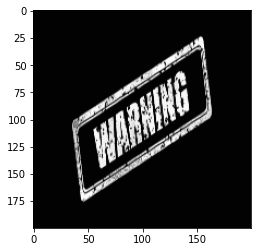

In [ ]:
mask_inv = cv2.bitwise_not(mask)
print(mask_inv.shape)
plt.imshow(mask_inv, cmap='gray')
cv2.imwrite('mask.png', mask_inv)

uint8
uint8


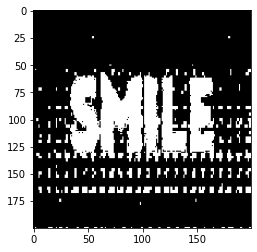

In [ ]:
# the mask is having shape 2 as it is gray scale image.
# we need to convert it in 3D
white_background = np.full(img2_resized.shape, 255, dtype=np.uint8)
# mask in bitwise_or should be 2D array
mask_bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
plt.imshow(mask_bk)
print(mask_bk.dtype)
print(img2_resized.dtype)

uint8


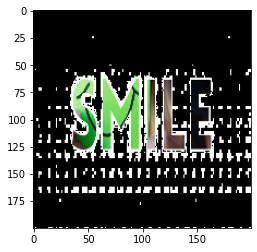

In [ ]:
print(img2_resized.dtype)
# mask in bitwise_or should be 2D array
foreground = cv2.bitwise_or(img2_resized, img2_resized, mask=mask_inv)
plt.imshow(foreground)

(200, 200, 3)


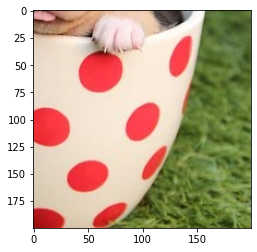

In [ ]:
# ROI from image1 where we need to paster the image 2
x_offset = img1.shape[1] - 200
y_offset = img1.shape[0] - 200
x_end = img1.shape[1]
y_end = img1.shape[0]
roi = img1[y_offset:y_end, x_offset:x_end]
print(roi.shape)
plt.imshow(roi)

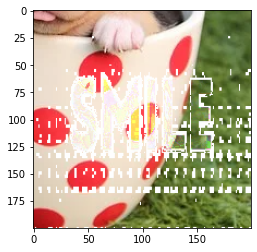

In [ ]:
blended = cv2.bitwise_or(roi, foreground)
plt.imshow(blended)

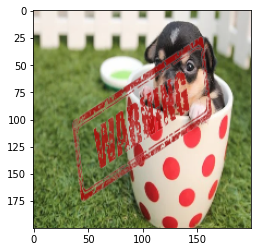

In [ ]:
import cv2

# Read the images
foreground = cv2.imread("text.png")
foreground = cv2.resize(foreground, (200,200))
foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
background = cv2.imread("puppy.png")
background = cv2.resize(background, (200,200))
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
alpha = cv2.imread("mask.png")

# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)

# Normalize the alpha mask to keep intensity between 0 and 1
alpha = alpha.astype(float)/255

# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)

# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)

# Add the masked foreground and background.
outImage = cv2.add(foreground, background)

# Display image
plt.imshow(outImage/255)